In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

from Model import Model
from PlaceInputs import PlaceInputs
from utils import *
import configs

In [2]:
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 300

In [3]:
def recall_plots(
    cache_identification, narrow_recall, wide_recall,
    cache_states, recall_downsampling_idxs=None):
    
    num_states, N_bar = cache_identification.shape
    threshold = 0.5
    if recall_downsampling_idxs is not None:
        narrow_recall = narrow_recall[:,recall_downsampling_idxs]
        wide_recall = wide_recall[:,recall_downsampling_idxs]
        N_bar = narrow_recall.shape[1]

    # Cache identification plot
    fig, ax = plt.subplots(figsize=(1.5,1.5))
    readout = np.linalg.norm(cache_identification, axis=1)
    readout /= readout.max()
    ax.plot(readout)
    idxs = readout > threshold
    y = readout[idxs]
    y[y>0] = 1.05
    ax.scatter(np.arange(100)[idxs], y, s=1, color='red')
    xtick_loc = []; xtick_label = [];
    for i, c in enumerate(cache_states):
        xtick_loc.append(c)
        xtick_label.append(f'C{i+1}')
    ax.set_xticks(xtick_loc)
    ax.set_xticklabels(xtick_label)
    ax.set_yticks([0, 0.50, 1.0])
    ax.set_ylabel('Output Norm')
    ax.set_xlabel('Current Place')
    plt.tight_layout()
    plt.show()
    
    # Recall plots
    fig, ax = plt.subplots(figsize=(1.5,1.5))
    narrow_recall = zero_out_invalid(narrow_recall, threshold)
    ax.imshow(narrow_recall.T, aspect=num_states/N_bar)
    ytick_loc = []; tick_label = [];
    for i, c in enumerate(cache_states):
        if recall_downsampling_idxs is not None:
            ytick_loc.append((c/num_states)*recall_downsampling_idxs.size)
        else:
            ytick_loc.append((c/num_states)*N_bar)
        tick_label.append(f'C{i+1}')
    ax.set_yticks(ytick_loc)
    ax.set_yticklabels(tick_label)
    ax.set_xticks(cache_states)
    ax.set_xticklabels(tick_label)
    ax.set_ylabel('Recalled Place')
    ax.set_xlabel('Current Place')
    plt.tight_layout()
    plt.show()
    
    
    # Wide recall plot
    fig, ax = plt.subplots(figsize=(1.5,1.5))
    wide_recall = zero_out_invalid(wide_recall, threshold)
    ax.imshow(wide_recall.T, aspect=num_states/N_bar)
    ytick_loc = []; tick_label = [];
    for i, c in enumerate(cache_states):
        if recall_downsampling_idxs is not None:
            ytick_loc.append((c/num_states)*recall_downsampling_idxs.size)
        else:
            ytick_loc.append((c/num_states)*N_bar)
        tick_label.append(f'C{i+1}')
    ax.set_yticks(ytick_loc)
    ax.set_yticklabels(tick_label)
    ax.set_xticks(cache_states)
    ax.set_xticklabels(tick_label)
    ax.set_ylabel('Recalled Place')
    ax.set_xlabel('Current Place')
    plt.tight_layout()
    plt.show()

# Parameters and Initialization

In [4]:
# Parameters
N_inp = 5000
N_bar = 5000
num_states = 100

In [5]:
cache_states = [20, 35, 70]

In [6]:
place_inputs = PlaceInputs(
    N_inp, num_states, decay_constant=0.0001).get_inputs()
model = Model(
    N_inp, N_bar, num_states,
    wide_search_factor=10
    )

# Example Narrow/Broad Recall

In [7]:
downsampling_idxs = list(np.linspace(0, N_inp, num=100, endpoint=False).astype(int))
for c in cache_states:
    idxs = list(np.argwhere(place_inputs[c]>place_inputs[c].min()).flatten())
    downsampling_idxs.extend(idxs)
downsampling_idxs = np.array(downsampling_idxs)
downsampling_idxs = np.sort(np.unique(downsampling_idxs))

In [8]:
N_plotted = downsampling_idxs.size

Now I just cached at location: 20


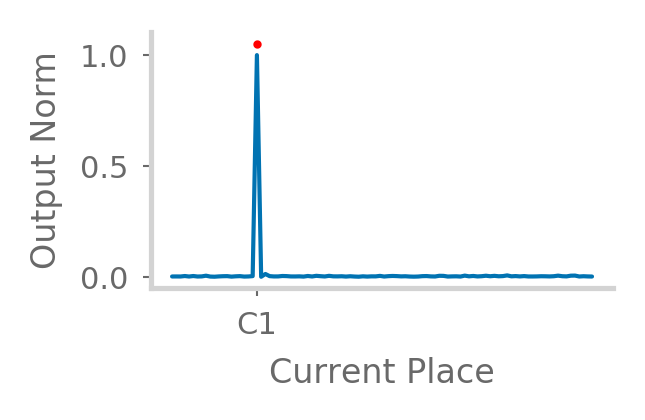

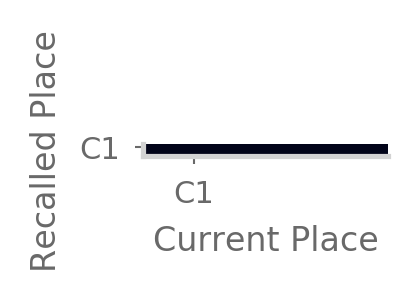

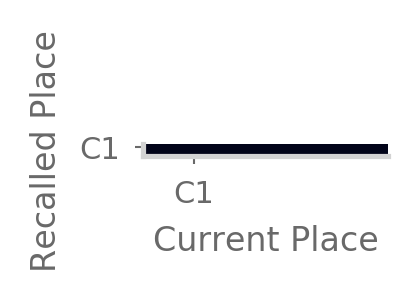

Now I just cached at location: 35


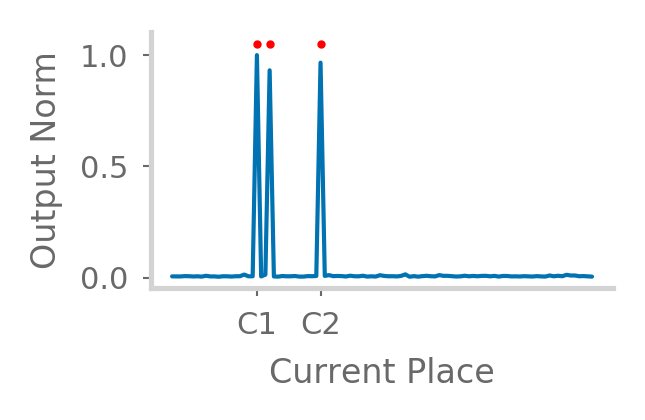

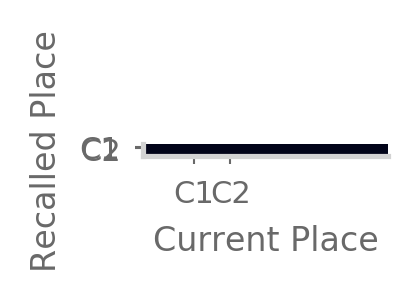

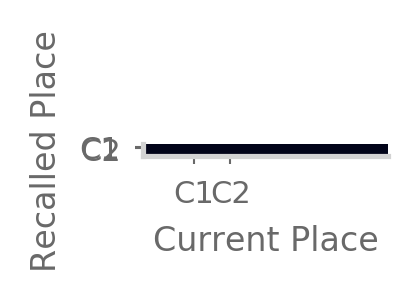

Now I just cached at location: 70


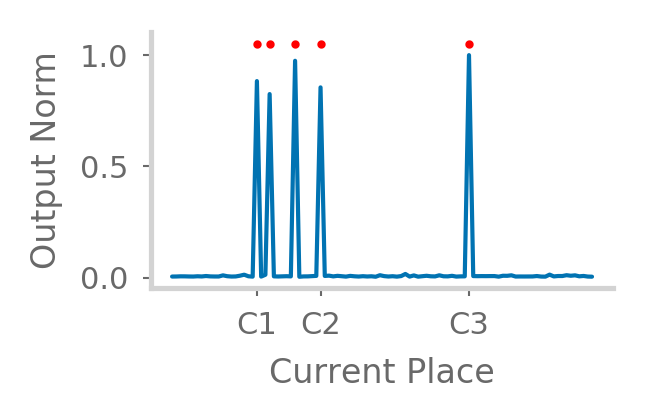

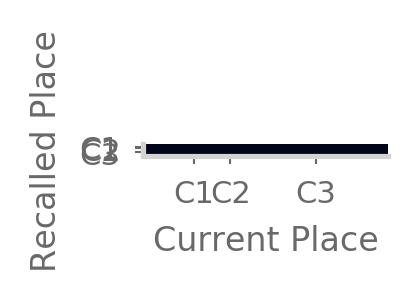

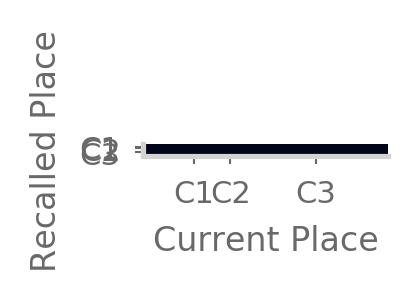

In [12]:
model.reset()

cache_identification = []
narrow_recall = []
wide_recall = []

for c_idx, cache_state in enumerate(cache_states):
    
    print("Now I just cached at location:", cache_state)
    preacts, acts, _, acts_over_time = model.run_recurrent(place_inputs, n_zero_input=20)
    model.update(place_inputs[cache_state], acts[cache_state], preacts[cache_state])

    _, _, _cache_identification, _ = model.run_recall(0., place_inputs)
    cache_identification.append(_cache_identification.copy())
    
    _, _, _narrow_recall, _ = model.run_narrow_recall(place_inputs)
    narrow_recall.append(_narrow_recall.copy())
    
    _, _, _wide_recall, _ = model.run_wide_recall(place_inputs)
    wide_recall.append(_wide_recall.copy())

    recall_plots(
        _cache_identification, _narrow_recall, _wide_recall,
        cache_states[:c_idx+1], recall_downsampling_idxs=downsampling_idxs)

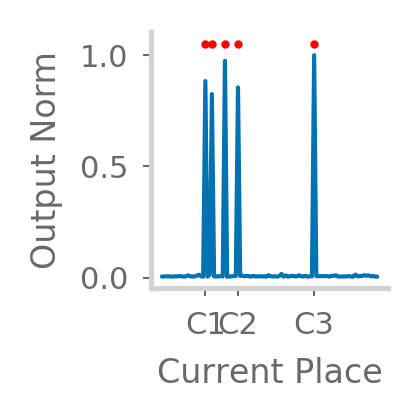

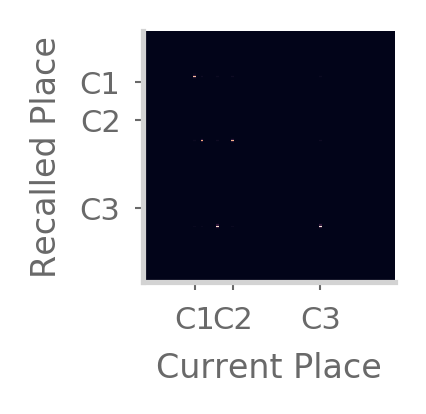

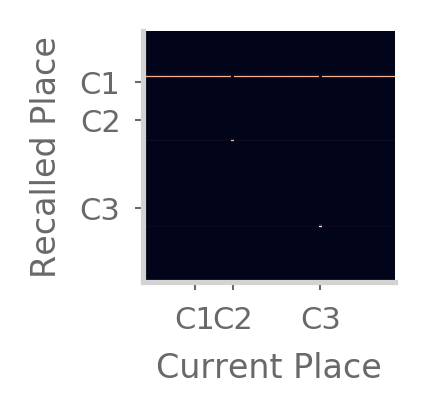

In [18]:
recall_plots(
    _cache_identification, _narrow_recall, _wide_recall,
    cache_states[:c_idx+1], recall_downsampling_idxs=downsampling_idxs)